In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df['mean area'].mean()

654.8891036906855

In [4]:
df['mean perimeter'].mean()

91.96903339191564

In [5]:
len(df.loc[df['target'] == 1])

357

In [8]:
x = df.drop(['target'], axis = 1)
y = df['target']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2)

In [15]:
knn2 = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
knn2_predicted = knn2.predict(X_test)

knn3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn3_predicted = knn3.predict(X_test)

knn4 = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
knn4_predicted = knn4.predict(X_test)

In [16]:
print("knn2 : ", accuracy_score(y_test, knn2_predicted))
print("knn3 : ", accuracy_score(y_test, knn3_predicted))
print("knn4 : ", accuracy_score(y_test, knn4_predicted))

knn2 :  0.9035087719298246
knn3 :  0.9473684210526315
knn4 :  0.956140350877193


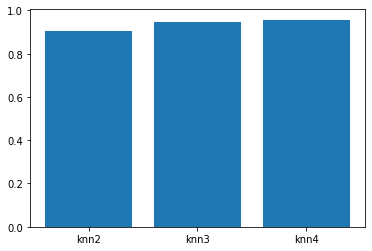

In [17]:
x = np.arange(3)

plt.bar(x, height= [accuracy_score(y_test, knn2_predicted),
accuracy_score(y_test, knn3_predicted),
accuracy_score(y_test, knn4_predicted)])

plt.xticks(x, ['knn2','knn3','knn4']);

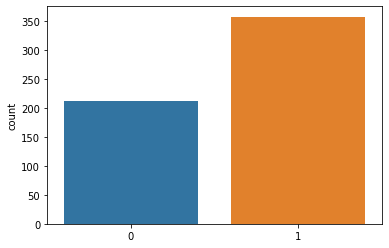

In [18]:
sns.countplot(x="target", data=cancer)